In [24]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Method 1
# json_file = open('Data/loan_data_json.json')
# data = json.load(json_file)

# Method 2
with open('Data/loan_data_json.json') as json_file:
    data = json.load(json_file)
#     print(data)

In [2]:
loandata = pd.DataFrame(data)
loandata.head()

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,purpose,revol.bal,revol.util
0,1,5639.958333,0,19.48,737,0,829.10,0.1189,11.350407,0,0,debt_consolidation,28854,52.1
1,1,2760.000000,0,14.29,707,0,228.22,0.1071,11.082143,0,0,credit_card,33623,76.7
2,1,4710.000000,0,11.63,682,1,366.86,0.1357,10.373491,0,0,debt_consolidation,3511,25.6
3,1,2699.958333,0,8.10,712,1,162.34,0.1008,11.350407,0,0,debt_consolidation,33667,73.2
4,1,4066.000000,1,14.97,667,0,102.92,0.1426,11.299732,0,0,credit_card,4740,39.5


In [3]:
loandata.shape

(9578, 14)

In [4]:
# finding unique values for the purpose column
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
# describe the data
loandata.describe()

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,revol.bal,revol.util
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000
mean,0.804970,4560.767197,0.163708,12.606679,710.846314,1.577469,319.089413,0.122640,10.932117,0.160054,0.062122,1.691396e+04,46.799236
std,0.396245,2496.930377,0.546215,6.883970,37.970537,2.200245,207.071301,0.026847,0.614813,0.366676,0.262126,3.375619e+04,29.014417
min,0.000000,178.958333,0.000000,0.000000,612.000000,0.000000,15.670000,0.060000,7.547502,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,2820.000000,0.000000,7.212500,682.000000,0.000000,163.770000,0.103900,10.558414,0.000000,0.000000,3.187000e+03,22.600000
50%,1.000000,4139.958333,0.000000,12.665000,707.000000,1.000000,268.950000,0.122100,10.928884,0.000000,0.000000,8.596000e+03,46.300000
75%,1.000000,5730.000000,0.000000,17.950000,737.000000,2.000000,432.762500,0.140700,11.291293,0.000000,0.000000,1.824950e+04,70.900000
max,1.000000,17639.958330,13.000000,29.960000,827.000000,33.000000,940.140000,0.216400,14.528354,1.000000,5.000000,1.207359e+06,119.000000


In [6]:
# describe the data for a specific column
loandata['int.rate'].describe() # interest rate

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [7]:
loandata['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [8]:
loandata['dti'].describe() # debt to income ratio

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [9]:
#  using exp to get annual income from log.annual.inc
loandata['income'] = np.exp(loandata['log.annual.inc'])
loandata.shape

(9578, 15)

In [10]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
credit.policy        9578 non-null int64
days.with.cr.line    9578 non-null float64
delinq.2yrs          9578 non-null int64
dti                  9578 non-null float64
fico                 9578 non-null int64
inq.last.6mths       9578 non-null int64
installment          9578 non-null float64
int.rate             9578 non-null float64
log.annual.inc       9578 non-null float64
not.fully.paid       9578 non-null int64
pub.rec              9578 non-null int64
purpose              9578 non-null object
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
income               9578 non-null float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.1+ MB


In [11]:
# using if statements
#fico Score

# fico >= 300 and < 400: 'Very Poor'
# fico >= 400 and ficoscore < 600: 'Poor'
# fico >= 601 and ficoscore < 660: 'Fair'
# fico >= 660 and ficoscore < 780: 'Good'
# fico >=780: 'Excellent'

fico = 700

if fico >= 300 and fico < 400: 
    ficocat = 'Very Poor'
elif fico >= 400 and fico < 600: 
    ficocat = 'Poor'
elif fico >= 601 and fico < 660: 
    ficocat = 'Fair'
elif fico >= 660 and fico < 780: 
    ficocat = 'Good'
elif fico >=780: 
    ficocat = 'Excellent'
else:
    ficocat = 'Unknown'
    
print(ficocat)

Good


In [16]:
# applying for loop to loan data
length = len(loandata)
ficocat = []
for x in range(0, length):
    fico = loandata['fico'][x]
    try:
        if fico >= 300 and fico < 400: 
            cat = 'Very Poor'
        elif fico >= 400 and fico < 600: 
            cat = 'Poor'
        elif fico >= 601 and fico < 660: 
            cat = 'Fair'
        elif fico >= 660 and fico < 780: 
            cat = 'Good'
        elif fico >=780: 
            cat = 'Excellent'
        else:
            cat = 'Unknown'
    except:
        cat = 'Unknown'
    ficocat.append(cat)
    
ficocat = pd.Series(ficocat)

loandata['fico.category'] = ficocat

loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
credit.policy        9578 non-null int64
days.with.cr.line    9578 non-null float64
delinq.2yrs          9578 non-null int64
dti                  9578 non-null float64
fico                 9578 non-null int64
inq.last.6mths       9578 non-null int64
installment          9578 non-null float64
int.rate             9578 non-null float64
log.annual.inc       9578 non-null float64
not.fully.paid       9578 non-null int64
pub.rec              9578 non-null int64
purpose              9578 non-null object
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
income               9578 non-null float64
fico.category        9578 non-null object
dtypes: float64(7), int64(7), object(2)
memory usage: 1.2+ MB


In [23]:
loandata.tail()

,credit.policy,days.with.cr.line,delinq.2yrs,dti,fico,inq.last.6mths,installment,int.rate,log.annual.inc,not.fully.paid,pub.rec,purpose,revol.bal,revol.util,income,fico.category,int.rate.type
9573,0,10474.000000,0,10.39,672,2,344.76,0.1461,12.180755,1,0,all_other,215372,82.1,195000.000479,Good,HIgh
9574,0,4380.000000,0,0.21,722,5,257.70,0.1253,11.141862,1,0,all_other,184,1.1,68999.999753,Good,HIgh
9575,0,3450.041667,0,13.09,687,8,97.81,0.1071,10.596635,1,0,debt_consolidation,10036,82.9,39999.999876,Good,Low
9576,0,1800.000000,0,19.18,692,5,351.58,0.1600,10.819778,1,0,home_improvement,0,3.2,49999.999779,Good,HIgh
9577,0,4740.000000,0,16.28,732,6,853.43,0.1392,11.264464,1,0,debt_consolidation,37879,57.0,78000.000338,Good,HIgh


In [20]:
# df.loc as conditional statements
# df.loc[df[columnName] condition, newColumnName] = 'value if the condition is met'
# for interest rates, a new column is wanted. rate > 0.12 then high, else low
loandata.loc[loandata['int.rate'] > 0.12, 'int.rate.type'] = 'HIgh'

In [22]:
loandata.loc[loandata['int.rate'] < 0.12, 'int.rate.type'] = 'Low'

In [25]:
#  number of loans/rows by fico.category

catplot = loandata.groupby(['fico.category']).size()
catplot

fico.category
Excellent     521
Fair          489
Good         8568
dtype: int64

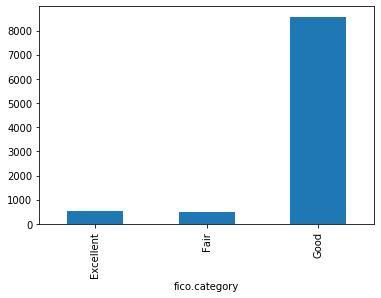

In [26]:
catplot.plot.bar()

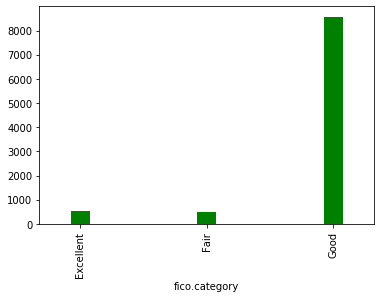

In [27]:
catplot.plot.bar(color = 'green', width = .15)

In [28]:
catplot = loandata.groupby(['purpose']).size()
catplot

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

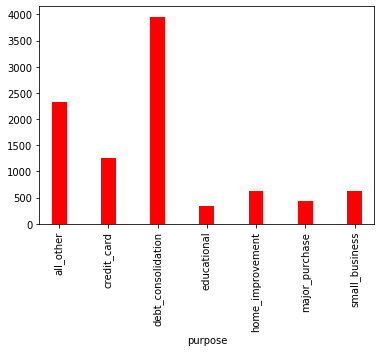

In [30]:
catplot.plot.bar(color = 'red', width = .3)

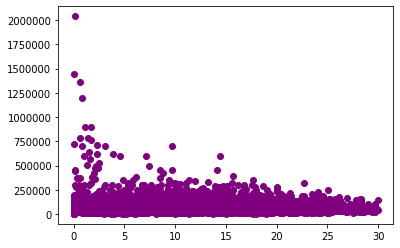

In [33]:
# scatter plots
ypoint, xpoint = loandata['income'], loandata['dti']
plt.scatter(xpoint, ypoint, color = 'purple')
plt.show()

In [36]:
# writing to csv
loandata.to_csv('Data/loandata_cleaned.csv', index=True)